<a href="https://colab.research.google.com/github/CataQM/CataQM/blob/main/Golden_vs_Brent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Golden Section vs Brent
## Catalina Quincosis Martínez
### 02/12/21
###Métodos de optimización de una dimensión
El propósito de estos métodos de optimización es localizar el mínimo de una función unimodal. Dicha propiedad de algunas funciones de valor real permite refinar el intervalo inicial donde se encuentra la solución, esto es posible al evaluar los valores de la función dentro del intervalo para desechar o no pedazos que ayuden a acercarse al objetivo.

Con esto en mente, se iniciará revisando algunas características del método  de la sección dorada aplicada a dos funciones unimodales, donde se verificará que la tasa de convergencia es el número dorado (o al menos está acotada por el).  







In [71]:
#@title Si quieres una explicación más detallada de los métodos mira los vídeos.
#Una pequeña muestra de html para hacer interactivo el reporte.
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/wpGN2xus75w" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
<iframe width="560" height="315" src="https://www.youtube.com/embed/BQm7uTYC0sg" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [72]:
#@title Importamos paquetes
##Importamos paquetes
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize 
import pandas as pd
from tabulate import tabulate

Text(0.5, 1.0, 'Función 1')

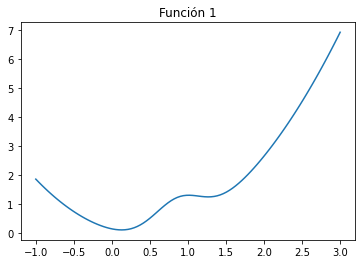

In [73]:
#@title Función 1 $$(x_0-x)^2+e^{-5(x-0.5-x_0)^2}$$

x = np.linspace(-1, 3, 100)
x0 = np.exp(-1)

def f(x):
    return (x-x0)**2 + np.exp(-5*(x -  0.5 - x0)**2)

plt.plot(x, f(x))
plt.title("Función 1")

Note que es una función unimodal que presenta una deformación cercana a la que posee el mínimo global del intervalo. La intención de tomar ésta función es ver la eficiencia del método cuando se presentan este tipo de "obstáculos".

In [74]:
#@title Aplicamos el método Golden y vemos el resultado

resultadog1= optimize.minimize_scalar(f, (1,4), method='golden')
resultadob1= optimize.minimize_scalar(f, (1,4), method='brent')
resultadog1

     fun: 0.12229946413411437
    nfev: 50
     nit: 45
 success: True
       x: 0.12812913224608025

####Cada una de las casillas antes expuestas significan lo siguiente:

*   **fun:** Valor de la función objetivo.
*   **nfev:** Número de las evaluaciones de la función objetivo.
*   **nit:** Número de iteraciones realizadas por el optimizador.
*   **succes:** Indica si el optimizador cerró correctamente o no.
*    **x:** Solución de la optimización.







El número de iteraciones es un poco alto. Ahora lo compararemos con el método de brent

Se observa una cantidad menor de iteraciones que la del método de Golden secction⚡


Una cosa que no se percibir es cómo se va acortando el intervalo, es decir, la función no permite ver la iteraciones realizadas. Tampoco se puede visualizar la taza de convergencia ¿qué pasa con τ? Es por esto que se plasmarán estos datos y seguiremos con el análisis.

Definimos la función iter que nos mostrará las iteraciones del optimizador:

In [75]:
#@title Iteraciones
#Se intoduce un nivel de tolerancia para que la convergancia sea más rápida
iter=5
res= optimize.minimize_scalar(f, (1,4), method='golden', tol=10**(-5),options={"maxiter": iter})
#Creamos una lista para guardar las iteraciones en cada paso que la función no encuentre el mínimo
res.success=False
iter = 1
X=[]
while res.success == False:
  res= optimize.minimize_scalar(f, (1,4), method='golden', tol=10**(-5), options={"maxiter": iter})
  X.append(res.x)
  iter+=1

vemos la gráfica del comportamiento del aproximador al mínimo de la función, es decir, el comportamineto de búsqueda a través de la iteraciones

Text(0.5, 1.0, 'Valores de x')

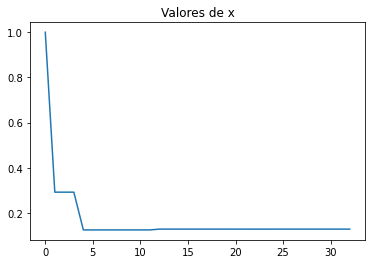

In [76]:
#@title Comportamiento de los valores que va tomando el método Golden
plt.plot(X)
plt.title("Valores de x")

Nótese que desde la iteración 12 los valores se van igualando o se van acercando al objetivo.

Text(0.5, 1.0, 'Valores de f(x)')

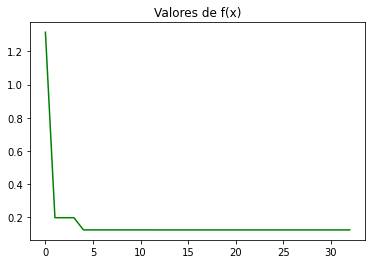

In [77]:
#@title Comportamiento de los valores que toma la función al ser evaluada en los puntos anteriores.
plt.plot(f(np.array(X)), 'g')
plt.title("Valores de f(x)")

In [78]:
#@title Tabla **x** vs **f(x)**
data = [np.array(X), f(np.array(X))]
#df = pd.DataFrame(data, columns = ['x, f'])
#date = pd.date_range(np.array(X), f(np.array(X)))
#df = pd.DataFrame(np.random.randn(len(Es), 4), index=data, columns= list("xxff"))
df = pd.DataFrame( np.random.randn(len(X), 2), index=data, columns= list("xf"))
#print(df )
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

╒════════════════════════════════════════════╤════════════╤════════════╕
│                                            │          x │          f │
╞════════════════════════════════════════════╪════════════╪════════════╡
│ (1.0, 1.315997586544325)                   │ -0.0808675 │ -0.456204  │
├────────────────────────────────────────────┼────────────┼────────────┤
│ (0.2917960672121712, 0.19604933665583962)  │ -0.270819  │ -0.973489  │
├────────────────────────────────────────────┼────────────┼────────────┤
│ (0.2917960672121712, 0.19604933665583962)  │ -1.10484   │ -0.0650359 │
├────────────────────────────────────────────┼────────────┼────────────┤
│ (0.2917960672121712, 0.19604933665583962)  │  0.121128  │  1.26468   │
├────────────────────────────────────────────┼────────────┼────────────┤
│ (0.12461179735054942, 0.12232968194531377) │  0.554702  │  0.406646  │
├────────────────────────────────────────────┼────────────┼────────────┤
│ (0.12461179735054942, 0.12232968194531377) │  0.4

En la tabla anterior se pueden observar los valores que toma el obtimizador (los valores de x) y lo que obtiene al evaluarlos en la función en cuestión.

# Error de la función con el método Golden

Definimos las función del error llamando a nuetro último valor de la lista *X*

Text(0.5, 1.0, 'Error')

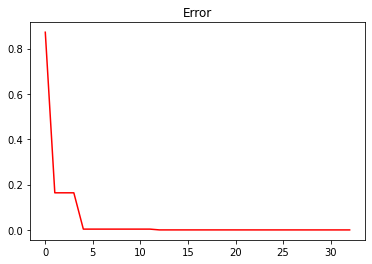

In [79]:
#@title Gráfica del error 
#Con el comando X[-1] estamos llamando al último valor de la lista
Es=abs(np.array(X)-X[-1])
#Luego graficamos el error
plt.plot(Es, 'r')
plt.title("Error")

A pesar que la gráfica del error es muy parecida a la de los valores de las iteraciones, lo que ésta nos muestra es la velocidad de convergancia del método. Véase cómo empieza en un valor muy alto y a medida que pasan las iteraciones se nota el descenso hasta estabilizarce (más o menos) en la iteración 15.

In [80]:
#@title Tabla **x** vs **Error**
data = [np.array(X), f(np.array(Es))]
df = pd.DataFrame( np.random.randn(len(X), 2), index=data, columns= list("xE"))
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

╒════════════════════════════════════════════╤════════════╤════════════╕
│                                            │          x │          E │
╞════════════════════════════════════════════╪════════════╪════════════╡
│ (1.0, 1.2539279073161278)                  │ -0.227054  │  1.39216   │
├────────────────────────────────────────────┼────────────┼────────────┤
│ (0.2917960672121712, 0.12548150352864176)  │  0.282021  │  0.450179  │
├────────────────────────────────────────────┼────────────┼────────────┤
│ (0.2917960672121712, 0.12548150352864176)  │  0.822546  │  0.186313  │
├────────────────────────────────────────────┼────────────┼────────────┤
│ (0.2917960672121712, 0.12548150352864176)  │ -0.283702  │ -2.94728   │
├────────────────────────────────────────────┼────────────┼────────────┤
│ (0.12461179735054942, 0.15661848500625236) │ -0.309277  │ -0.313507  │
├────────────────────────────────────────────┼────────────┼────────────┤
│ (0.12461179735054942, 0.15661848500625236) │ -1.1

# Tasa de convergencia (Golden)

El propósito de calcular la tasa de este ejemplo particular, es ver ¿cómo se ve con respecto a la proporción áurea? Lo que se espera es que la taza alcance ese valor o se encuentre por abajo de él. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


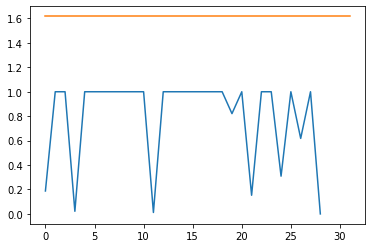

In [81]:
#@title Gráfica de la tasa de convergencia de la función 1 comparada con el número áureo. 
T=[]
for i in range(len(Es)-1):
  t=Es[i+1]/Es[i]
  T.append(t)

p=(1+np.sqrt(5))/2
plt.plot(T)
plt.plot(p*np.ones(len(T)))

Con la imagen anterior nos queda claro que la tasa de convergencia del método varía dependiendo de la función, sin embargo, ésta se encuentra acotada por el número áureo, lo que nos indica que con ésta función el método Golden no es tan óptimo. 

# Método de Brent

In [82]:
#@title Información sobre la aplicación del método Brent.
resultadob1

     fun: 0.12229946413411436
    nfev: 20
     nit: 16
 success: True
       x: 0.1281291321007896

Note que el número de iteraciones se redujo en una cantidad considerable, pues  con el método anterior llegamos al valor del mínimo en 45 iteraciones. Esto puede ser reflejo de la efectividad de la interpolación parabólica que usa el método de Brent.

A  continuación observe el comportamiento de las variables obtenidas por éste método.

In [83]:
#@title Iteraciones Brent
#Se intoduce un nivel de tolerancia para que la convergancia sea más rápida
iter1=5
res1= optimize.minimize_scalar(f, (1,4), method='brent', tol=10**(-5),options={"maxiter": iter1})
#Creamos una lista para guardar las iteraciones en cada paso que la función no encuentre el mínimo
res1.success=False
iter1 = 1
X1=[]
while res1.success == False:
  res1= optimize.minimize_scalar(f, (1,4), method='brent', tol=10**(-5), options={"maxiter": iter1})
  X1.append(res1.x)
  iter1+=1

In [84]:
#@title Tabla **x** vs **f(x)**
data = [np.array(X1), f(np.array(X1))]
#df = pd.DataFrame(data, columns = ['x, f'])
#date = pd.date_range(np.array(X), f(np.array(X)))
#df = pd.DataFrame(np.random.randn(len(Es), 4), index=data, columns= list("xxff"))
df = pd.DataFrame( np.random.randn(len(X1), 2), index=data, columns= list("xf"))
#print(df )
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

╒════════════════════════════════════════════╤════════════╤═════════════╕
│                                            │          x │           f │
╞════════════════════════════════════════════╪════════════╪═════════════╡
│ (1.0, 1.315997586544325)                   │ -0.322064  │ -0.00664519 │
├────────────────────────────────────────────┼────────────┼─────────────┤
│ (1.0, 1.315997586544325)                   │ -0.192781  │ -0.801808   │
├────────────────────────────────────────────┼────────────┼─────────────┤
│ (0.1569882914397065, 0.1243869264745339)   │ -0.932302  │ -1.12333    │
├────────────────────────────────────────────┼────────────┼─────────────┤
│ (0.10497263418732466, 0.12358842081953766) │  0.906663  │  0.609283   │
├────────────────────────────────────────────┼────────────┼─────────────┤
│ (0.1260669529468017, 0.12230986330907762)  │ -0.452889  │  1.328      │
├────────────────────────────────────────────┼────────────┼─────────────┤
│ (0.12785602634593277, 0.122299646788

Text(0.5, 1.0, 'Valores de x')

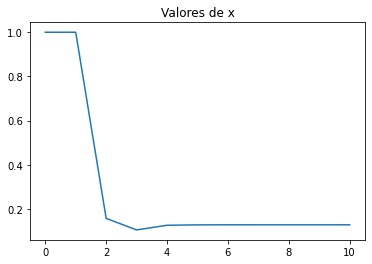

In [85]:
#@title Comportamiento de los valores que va tomando el método Brent
plt.plot(X1)
plt.title("Valores de x")

Text(0.5, 1.0, 'Valores de f(x)')

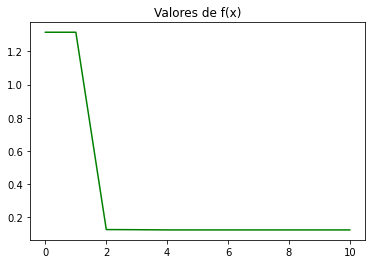

In [86]:
#@title Comportamiento de *f(x)*
plt.plot(f(np.array(X1)), 'g')
plt.title("Valores de f(x)")

# Resultados de las gráficas
Esto nos muestra la rapidez con que el método encuentra los valores tanto del mínimo como el de la función en este punto. Se nota a simple vista que a partir de la segunda iteración los valores obtienen estabilidad.

# Error en el metodo Brent

Text(0.5, 1.0, 'Error')

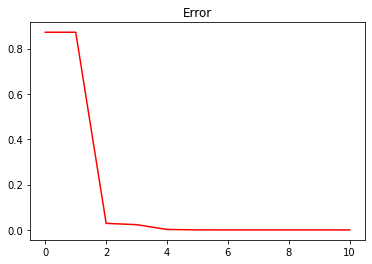

In [87]:
#@title Gráfica del error 
#Con el comando X[-1] estamos llamando al último valor de la lista
Es1=abs(np.array(X1)-X1[-1])
#Luego graficamos el error
plt.plot(Es1, 'r')
plt.title("Error")

In [88]:
#@title Tabla **x** vs **Error**
data = [np.array(X1), f(np.array(Es1))]
df = pd.DataFrame( np.random.randn(len(X1), 2), index=data, columns= list("xE"))
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

╒════════════════════════════════════════════╤════════════╤═══════════╕
│                                            │          x │         E │
╞════════════════════════════════════════════╪════════════╪═══════════╡
│ (1.0, 1.2539275060552186)                  │ -0.0254569 │  1.128    │
├────────────────────────────────────────────┼────────────┼───────────┤
│ (1.0, 1.2539275060552186)                  │  0.33591   │  0.295468 │
├────────────────────────────────────────────┼────────────┼───────────┤
│ (0.1569882914397065, 0.14454093017864425)  │ -0.238191  │  0.390771 │
├────────────────────────────────────────────┼────────────┼───────────┤
│ (0.10497263418732466, 0.14705212445592958) │  0.286329  │ -0.927253 │
├────────────────────────────────────────────┼────────────┼───────────┤
│ (0.1260669529468017, 0.15738233247147254)  │ -0.144755  │ -0.515895 │
├────────────────────────────────────────────┼────────────┼───────────┤
│ (0.12785602634593277, 0.15833197103482635) │ -0.703596  │  0.1

# Tasa de convergencia (Brent)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


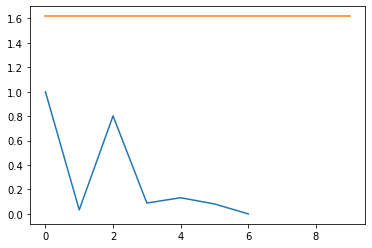

In [89]:
#@title Gráfica de la tasa de convergencia de la función 1 comparada con el número áureo. 
T1=[]
for i in range(len(Es1)-1):
  t=Es1[i+1]/Es1[i]
  T1.append(t)

p=(1+np.sqrt(5))/2
plt.plot(T1)
plt.plot(p*np.ones(len(T1)))

Observe que la tasa de convergencia del método de brent es mucho menor que el número áureo, más aún tiene una convergencia cuadrática que puede apreciarse en el descenso que presenta, mientras que en el método Golden la tasa tiende a ser constante.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Función 2')

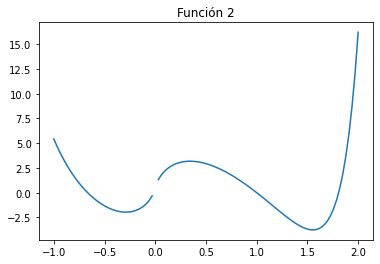

In [90]:
#@title Función 2  $$\frac{1}{2}(1-x)^2\cdot e^{x^2}-4 x\cdot ln(x^2)$$
x = np.linspace(-1, 2, 100)
def g(x):
  return 1/2*((1-x)**2*np.exp(x**2))-4*x*np.log(x**2)

plt.plot(x, g(x))
plt.title("Función 2")
  

In [91]:
#@title Aplicamos los métodos golden y Brent 
#resultadog hace referencia a la aplicación del método de golden section.
#resultadob Hace referencia a la aplicación del método de Brent.

resultadog2 = optimize.minimize_scalar(g, (-1,2), method='golden')
resultadob2 = optimize.minimize_scalar(g, (-1,2), method='brent')

In [92]:
#@title Información sobre la aplicación del método Golden.
resultadog2

     fun: -3.763411563377205
    nfev: 45
     nit: 40
 success: True
       x: 1.5538693023374048

Algo interesante de anotar es que a pesar que el método Golden utilizó un número mayor de iteraciones, llegó acertivamente al máximo global.

In [93]:
#@title Información sobre la aplicación del método Brent.
resultadob2

     fun: -1.966826108593527
    nfev: 18
     nit: 14
 success: True
       x: -0.28922590981914426

La anotación anterior es porque el método de Brent encontró el mínimo local de la función, esto puede deberse a que en el intervalo escogido la función no es unimodal, de manera que la interpolación del método pudo haber descartado puntos al lado derecho del salto por encontrar las características deseadas antes del mismo, en otras palabras, La interpolación dió como resultado una parábola sesgada hacia el lado derecho. Obviamente si se redefine el intervalo de la función, el método de Brent acierta pero posee esa desventaja con respecto al método Golden.

Ya se ha notado la ventaja que tiene el método de Brent con respecto al de Golden, pero se verá nuevamente la comparación de la aplicación de estos métodos a la función 2. Tal como se ve en la gráfica, la función contiene un salto en 0 por la indefinición del logaritmo en ese punto, sin embargo esto no ha sido problema para el cálculo de los dos métodos.

In [94]:
#@title Iteraciones de la función **g** (Golden)
#Se intoduce un nivel de tolerancia para que la convergancia sea más rápida
iter2=5
res2= optimize.minimize_scalar(g, (-1,2), method='golden', tol=10**(-5),options={"maxiter": iter2})
#Creamos una lista para guardar las iteraciones en cada paso que la función no encuentre el mínimo
res2.success=False
iter2 = 1
X2=[]
while res2.success == False:
  res2= optimize.minimize_scalar(g, (-1,2), method='golden', tol=10**(-5), options={"maxiter": iter2})
  X2.append(res2.x)
  iter2+=1

In [95]:
#@title Iteraciones de la función **g** (Brent)
#Se intoduce un nivel de tolerancia para que la convergancia sea más rápida
#Agregamos a las definiciones el indicativo **2b** para referirnos a los cálculos de la función 2 con el método 'Brent'.
iter2b=5
res2b= optimize.minimize_scalar(g, (-1,2), method='brent', tol=10**(-5),options={"maxiter": iter2b})
#Creamos una lista para guardar las iteraciones en cada paso que la función no encuentre el mínimo
res2b.success=False
iter2b = 1
X2b=[]
while res2b.success == False:
  res2b= optimize.minimize_scalar(g, (-1,2), method='brent', tol=10**(-5), options={"maxiter": iter2b})
  X2b.append(res2b.x)
  iter2b+=1

A partir de aquí analizaremos los resultados obtenidos por el método Golden en la función 2, no tiene sentido comparar los métodos si no se obtuvo el resultado deseado en igualdad de condiciones por parte del método de Brent.

In [96]:
#@title Tabla **x** vs **g(x)** (Golden)
data2 = [np.array(X2), f(np.array(X2))]
#df = pd.DataFrame(data, columns = ['x, f'])
#date = pd.date_range(np.array(X), f(np.array(X)))
#df = pd.DataFrame(np.random.randn(len(Es), 4), index=data, columns= list("xxff"))
df2 = pd.DataFrame( np.random.randn(len(X2), 2), index=data2, columns= list("xg"))
#print(df )
print(tabulate(df2, headers='keys', tablefmt='fancy_grid'))

╒═══════════════════════════════════════════╤═══════════╤═══════════╕
│                                           │         x │         g │
╞═══════════════════════════════════════════╪═══════════╪═══════════╡
│ (0.1458980299999999, 0.12308392122421288) │ -1.88951  │ -0.3615   │
├───────────────────────────────────────────┼───────────┼───────────┤
│ (0.8541019616140396, 1.2354636949187134)  │  1.35886  │  0.36915  │
├───────────────────────────────────────────┼───────────┼───────────┤
│ (1.2917960632031518, 1.2607911012332318)  │  0.597805 │ -2.01379  │
├───────────────────────────────────────────┼───────────┼───────────┤
│ (1.562305895207736, 1.516367472692141)    │  1.71866  │  0.943352 │
├───────────────────────────────────────────┼───────────┼───────────┤
│ (1.562305895207736, 1.516367472692141)    │ -2.10882  │ -0.264843 │
├───────────────────────────────────────────┼───────────┼───────────┤
│ (1.562305895207736, 1.516367472692141)    │  0.205108 │ -0.552369 │
├───────────────────

Text(0.5, 1.0, 'Valores de x')

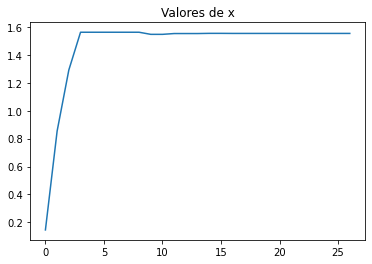

In [97]:
#@title Comportamiento de los valores x en la función 2 (Golden)
plt.plot(X2)
plt.title("Valores de x")

Text(0.5, 1.0, 'Valores de x (Brent)')

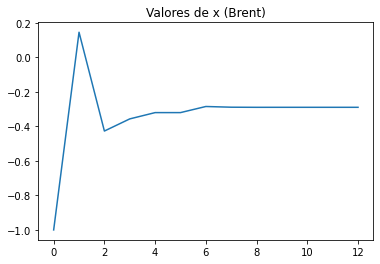

In [105]:
#@title Comportamiento de los valores x en la función 2 (Brent)
plt.plot(X2b)
plt.title("Valores de x (Brent)")

Nótese la diferencia de valores que toman ambos métodos. A pesar de que coinciden algunos puntos en las primeras dos iteraciones, el método de Bren desciende y toma puntos en lo que sería el mínimo local.

In [99]:
#@title Tabla **x** vs **g(x)** (Golden)
data2b = [np.array(X2b), g(np.array(X2b))]
#df = pd.DataFrame(data, columns = ['x, f'])
#date = pd.date_range(np.array(X), f(np.array(X)))
#df = pd.DataFrame(np.random.randn(len(Es), 4), index=data, columns= list("xxff"))
df2b = pd.DataFrame( np.random.randn(len(X2b), 2), index=data2b, columns= list("xg"))
#print(df )
print(tabulate(df2b, headers='keys', tablefmt='fancy_grid'))

╒═════════════════════════════════════════════╤════════════╤═══════════╕
│                                             │          x │         g │
╞═════════════════════════════════════════════╪════════════╪═══════════╡
│ (-1.0, 5.43656365691809)                    │ -0.932122  │ -0.65297  │
├─────────────────────────────────────────────┼────────────┼───────────┤
│ (0.14589800000000008, 2.6192436246299553)   │ -0.0901933 │ -0.371479 │
├─────────────────────────────────────────────┼────────────┼───────────┤
│ (-0.42678422583594233, -1.6859626303644188) │ -1.97814   │  0.465122 │
├─────────────────────────────────────────────┼────────────┼───────────┤
│ (-0.3564173177611718, -1.8970484711427773)  │  0.790229  │  0.894812 │
├─────────────────────────────────────────────┼────────────┼───────────┤
│ (-0.31996525510381735, -1.9518468009452663) │  0.555552  │  1.15742  │
├─────────────────────────────────────────────┼────────────┼───────────┤
│ (-0.31996525510381735, -1.9518468009452663) │  2.

Text(0.5, 1.0, 'Valores de g(x)')

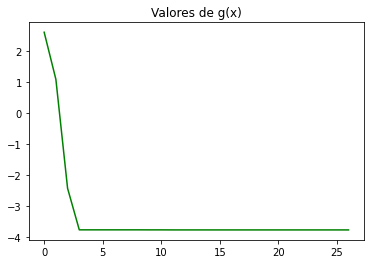

In [100]:
#@title Comportamiento de *f(x)*
plt.plot(g(np.array(X2)), 'g')
plt.title("Valores de g(x)")

# Error en el método Golden en la función 2

Text(0.5, 1.0, 'Error')

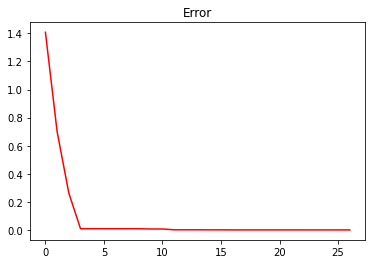

In [101]:
#@title Gráfica del error 
#Con el comando X[-1] estamos llamando al último valor de la lista
Es2=abs(np.array(X2)-X2[-1])
#Luego graficamos el error
plt.plot(Es2, 'r')
plt.title("Error")

El error se "estabiliza" a partir de la iteración 12. Por esto es que a partir de esta iteración el optimizador toma valores influyentes en la ubicación del mínimo. La posible ventaja del método pudo inferir en la forma en como se acorta el intervalo inicial, es decir que al tomar intervalos tanto de derecha como de izquierda, el optimizador pudo localizar la diferencia entre los mínimos y concretar el global. 

In [104]:
#@title Tabla **x** vs **Error**
#El indicativo 2g nos dice estamos trabajando en la función 2 con el método Golden.
data2g = [np.array(X2), g(np.array(Es2))]
df2g = pd.DataFrame( np.random.randn(len(X2), 2), index=data2g, columns= list("xE"))
print(tabulate(df2g, headers='keys', tablefmt='fancy_grid'))

╒══════════════════════════════════════════╤════════════╤════════════╕
│                                          │          x │          E │
╞══════════════════════════════════════════╪════════════╪════════════╡
│ (0.1458980299999999, -3.249715026566405) │  1.07811   │ -0.418087  │
├──────────────────────────────────────────┼────────────┼────────────┤
│ (0.8541019616140396, 2.072122026219141)  │ -0.509895  │  0.739231  │
├──────────────────────────────────────────┼────────────┼────────────┤
│ (1.2917960632031518, 3.0992284978583347) │ -0.820022  │ -1.10533   │
├──────────────────────────────────────────┼────────────┼────────────┤
│ (1.562305895207736, 0.8139290139073445)  │  1.45946   │  0.231905  │
├──────────────────────────────────────────┼────────────┼────────────┤
│ (1.562305895207736, 0.8139290139073445)  │  0.111207  │  0.474753  │
├──────────────────────────────────────────┼────────────┼────────────┤
│ (1.562305895207736, 0.8139290139073445)  │  1.16104   │ -1.21557   │
├─────

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Note que en los valores de la tabla se aprecian los saltos que da el optimizador al buscar la diferencia entre los puntos.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


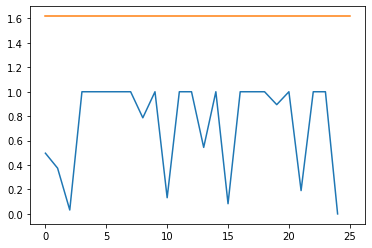

In [103]:
#@title Gráfica de la tasa de convergencia de la función 2 comparada con el número áureo. 
T2=[]
for i in range(len(Es2)-1):
  t=Es2[i+1]/Es2[i]
  T2.append(t)

p=(1+np.sqrt(5))/2
plt.plot(T2)
plt.plot(p*np.ones(len(T2)))

Nuevamente vemos que la tasa de convergencia se aprecia como una cota superior. También se ve que la tendencia de la tasa es parcialmente constante aunque no logre ser exactamente el número áureo.

# Conclusiones


*   Se encontró que el método de Brent resulta más efectivo que el de Golden para funciones unimodales en un intervalo, por la interpolación tomando tres puntos dentro del intervalo.


*   El método Golden es un poco más tardío pero la forma en que particiona y evalúa los intervalos de la función le permite encontrar el mínimo global de un función multinodal o parcialmente unimodal.


*   Estos métodos funcionan bien para funciones unimodales. 







# Referencias

Heath, M. T. (2018). Scientific Computing: An Introductory Survey, Revised Second Edition. Society for Industrial and Applied Mathematics.